In [106]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore') 

start = time.perf_counter()

In [107]:
df = pd.read_csv('earl694412-infinite-matchhistory.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               664 non-null    object 
 1   Player             664 non-null    object 
 2   MatchId            664 non-null    object 
 3   Map                664 non-null    object 
 4   Category           664 non-null    object 
 5   Playlist           664 non-null    object 
 6   Input              664 non-null    object 
 7   Queue              664 non-null    object 
 8   PreCsr             664 non-null    int64  
 9   PostCsr            664 non-null    int64  
 10  Rank               664 non-null    int64  
 11  WasAtStart         664 non-null    int64  
 12  WasAtEnd           664 non-null    int64  
 13  WasInProgressJoin  664 non-null    int64  
 14  Mmr                2 non-null      float64
 15  Outcome            664 non-null    object 
 16  Accuracy           664 non

In [108]:
df['Date'] = pd.to_datetime(df['Date'])
df['LengthMinutes'] = df['LengthSeconds'] / 60
df.rename(columns={'TotalKills': 'Kills'}, inplace=True)
df['DamageRatio'] = df['DamageDone'] / df['DamageTaken']
df['Kills/10Min'] = (df['Kills'] / df['LengthMinutes']) * 10
df['Deaths/10Min'] = (df['Deaths'] / df['LengthMinutes']) * 10
df['Assists/10Min'] = (df['Assists'] / df['LengthMinutes']) * 10
df['Dmg/10Min'] = (df['DamageDone'] / df['LengthMinutes']) * 10
df['DmgT/10Min'] = (df['DamageTaken'] / df['LengthMinutes']) * 10
df['ExcessKills'] = df['Kills'] - df['ExpectedKills']
df['ExcessDeaths'] = df['ExpectedDeaths'] - df['Deaths']
df['ExcessKD'] = df['KD'] - round((df['ExpectedKills'] / df['ExpectedDeaths']),2)
df['LifetimeKD'] = df['Kills'].cumsum() / df['Deaths'].cumsum()
df['LifetimeDmgRatio'] = df['DamageDone'].cumsum() / df['DamageTaken'].cumsum()
df['LifetimeAcc'] = df['ShotsLanded'].cumsum() / df['ShotsFired'].cumsum() * 100
df['LifetimeMeleePct'] = df['KillsMelee'].cumsum() / df['Kills'].cumsum() * 100
df['LifetimeHSPct'] = df['KillsHeadshot'].cumsum() / df['Kills'].cumsum() * 100
df['LifetimeGrenadePct'] = df['KillsGrenade'].cumsum() / df['Kills'].cumsum() * 100
df['LifetimePowerPct'] = df['KillsPower'].cumsum() / df['Kills'].cumsum() * 100
df['Map'] = df['Map'].str.replace(' - Ranked', '')

df = df.drop(['Player', 'MatchId', 'Input', 'Queue', 'Mmr', 'WasAtStart', 'WasAtEnd',
            'WasInProgressJoin', 'AssistsEmp', 'AssistsDriver', 'AssistsCallout', 'VehicleDestroys',
            'VehicleHijacks', 'Perfects', 'PreCsr'],axis=1)
dfr = df[df['Date']> '2023-01-01']
dfr = dfr[dfr['Playlist'] == 'Ranked Arena']
dfr['Csr'] = dfr['PostCsr'].replace(0, method='ffill')
dfr = dfr[dfr['Outcome'] != 'Draw']
dfr = dfr[dfr['Outcome'] != 'Left']
dfr['Outcome'] = dfr['Outcome'].map({'Win': 1, 'Loss': 0})
dfr['LifetimeWinRate'] = (dfr['Outcome'].cumsum() / 
                          (dfr['Outcome'].cumsum() + 
                           dfr['Outcome'].eq(0).cumsum())).fillna(0)
dfr = dfr.drop(['Playlist', 'PostCsr'], axis=1).reset_index()
# dfr.loc[:4, 'Csr'] = 808
dfr.to_csv('df.csv')
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               434 non-null    int64         
 1   Date                434 non-null    datetime64[ns]
 2   Map                 434 non-null    object        
 3   Category            434 non-null    object        
 4   Rank                434 non-null    int64         
 5   Outcome             434 non-null    int64         
 6   Accuracy            434 non-null    float64       
 7   DamageDone          434 non-null    int64         
 8   DamageTaken         434 non-null    int64         
 9   ShotsFired          434 non-null    int64         
 10  ShotsLanded         434 non-null    int64         
 11  ShotsMissed         434 non-null    int64         
 12  KD                  434 non-null    float64       
 13  KDA                 434 non-null    float64       

In [109]:
dfr.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,434.0,399.649770,149.210352,140.000000,274.250000,400.500000,528.750000,663.000000
Rank,434.0,3.951613,2.187506,1.000000,2.000000,4.000000,5.000000,8.000000
Outcome,434.0,0.534562,0.499380,0.000000,0.000000,1.000000,1.000000,1.000000
Accuracy,434.0,51.612880,5.401675,24.390000,48.470000,51.645000,54.712500,80.560000
DamageDone,434.0,5144.087558,1819.258151,347.000000,3839.000000,4856.500000,6288.000000,12673.000000
DamageTaken,434.0,4413.018433,1520.002417,276.000000,3414.000000,4197.500000,5335.000000,9962.000000
ShotsFired,434.0,233.228111,78.956772,16.000000,180.000000,223.000000,288.750000,468.000000
ShotsLanded,434.0,120.140553,41.862980,4.000000,93.000000,113.000000,148.000000,281.000000
ShotsMissed,434.0,113.087558,40.365154,7.000000,84.250000,109.000000,139.750000,261.000000
KD,434.0,1.245691,0.652719,0.000000,0.860000,1.130000,1.450000,6.000000


In [110]:
print("Kills           ", dfr.Kills.sum())
print("Expected Kills  ", round(dfr.ExpectedKills.sum(),))
print("Deaths          ", dfr.Deaths.sum())
print("Expected Deaths ", round(dfr.ExpectedDeaths.sum(),))
print("KD              ", round(dfr.Kills.sum() / dfr.Deaths.sum(),2))
print("Excepcted KD    ", round(dfr.ExpectedKills.sum() / dfr.ExpectedDeaths.sum(),2))


Kills            6316
Expected Kills   6212
Deaths           5575
Expected Deaths  6142
KD               1.13
Excepcted KD     1.01


In [111]:
dfr.tail()

,index,Date,Map,Category,Rank,Outcome,Accuracy,DamageDone,DamageTaken,ShotsFired,...,ExcessKD,LifetimeKD,LifetimeDmgRatio,LifetimeAcc,LifetimeMeleePct,LifetimeHSPct,LifetimeGrenadePct,LifetimePowerPct,Csr,LifetimeWinRate
429,658,2024-01-23 03:41:25,Live Fire,Oddball,2,1,52.65,7728,6804,321,...,-0.06,1.112749,1.156231,49.741978,10.315284,50.285584,6.968243,3.529815,1061,0.534884
430,660,2024-01-23 04:06:36,Recharge,Slayer,3,1,49.26,4256,3148,203,...,0.66,1.112973,1.156559,49.743207,10.321624,50.273723,6.957117,3.524179,1054,0.535963
431,661,2024-01-23 04:18:10,Recharge,King of the Hill,5,0,51.87,5556,4806,214,...,-0.24,1.112223,1.156558,49.745648,10.317731,50.290400,6.958205,3.518961,1045,0.534722
432,662,2024-01-23 04:28:52,Recharge,Strongholds,5,0,46.05,4695,4470,228,...,-0.07,1.111771,1.156380,49.741135,10.326396,50.290003,6.948709,3.514159,1037,0.533487
433,663,2024-01-23 04:40:12,Live Fire,King of the Hill,4,1,51.22,4229,2678,164,...,0.58,1.112402,1.156805,49.742434,10.308810,50.295186,6.936876,3.542234,1045,0.534562


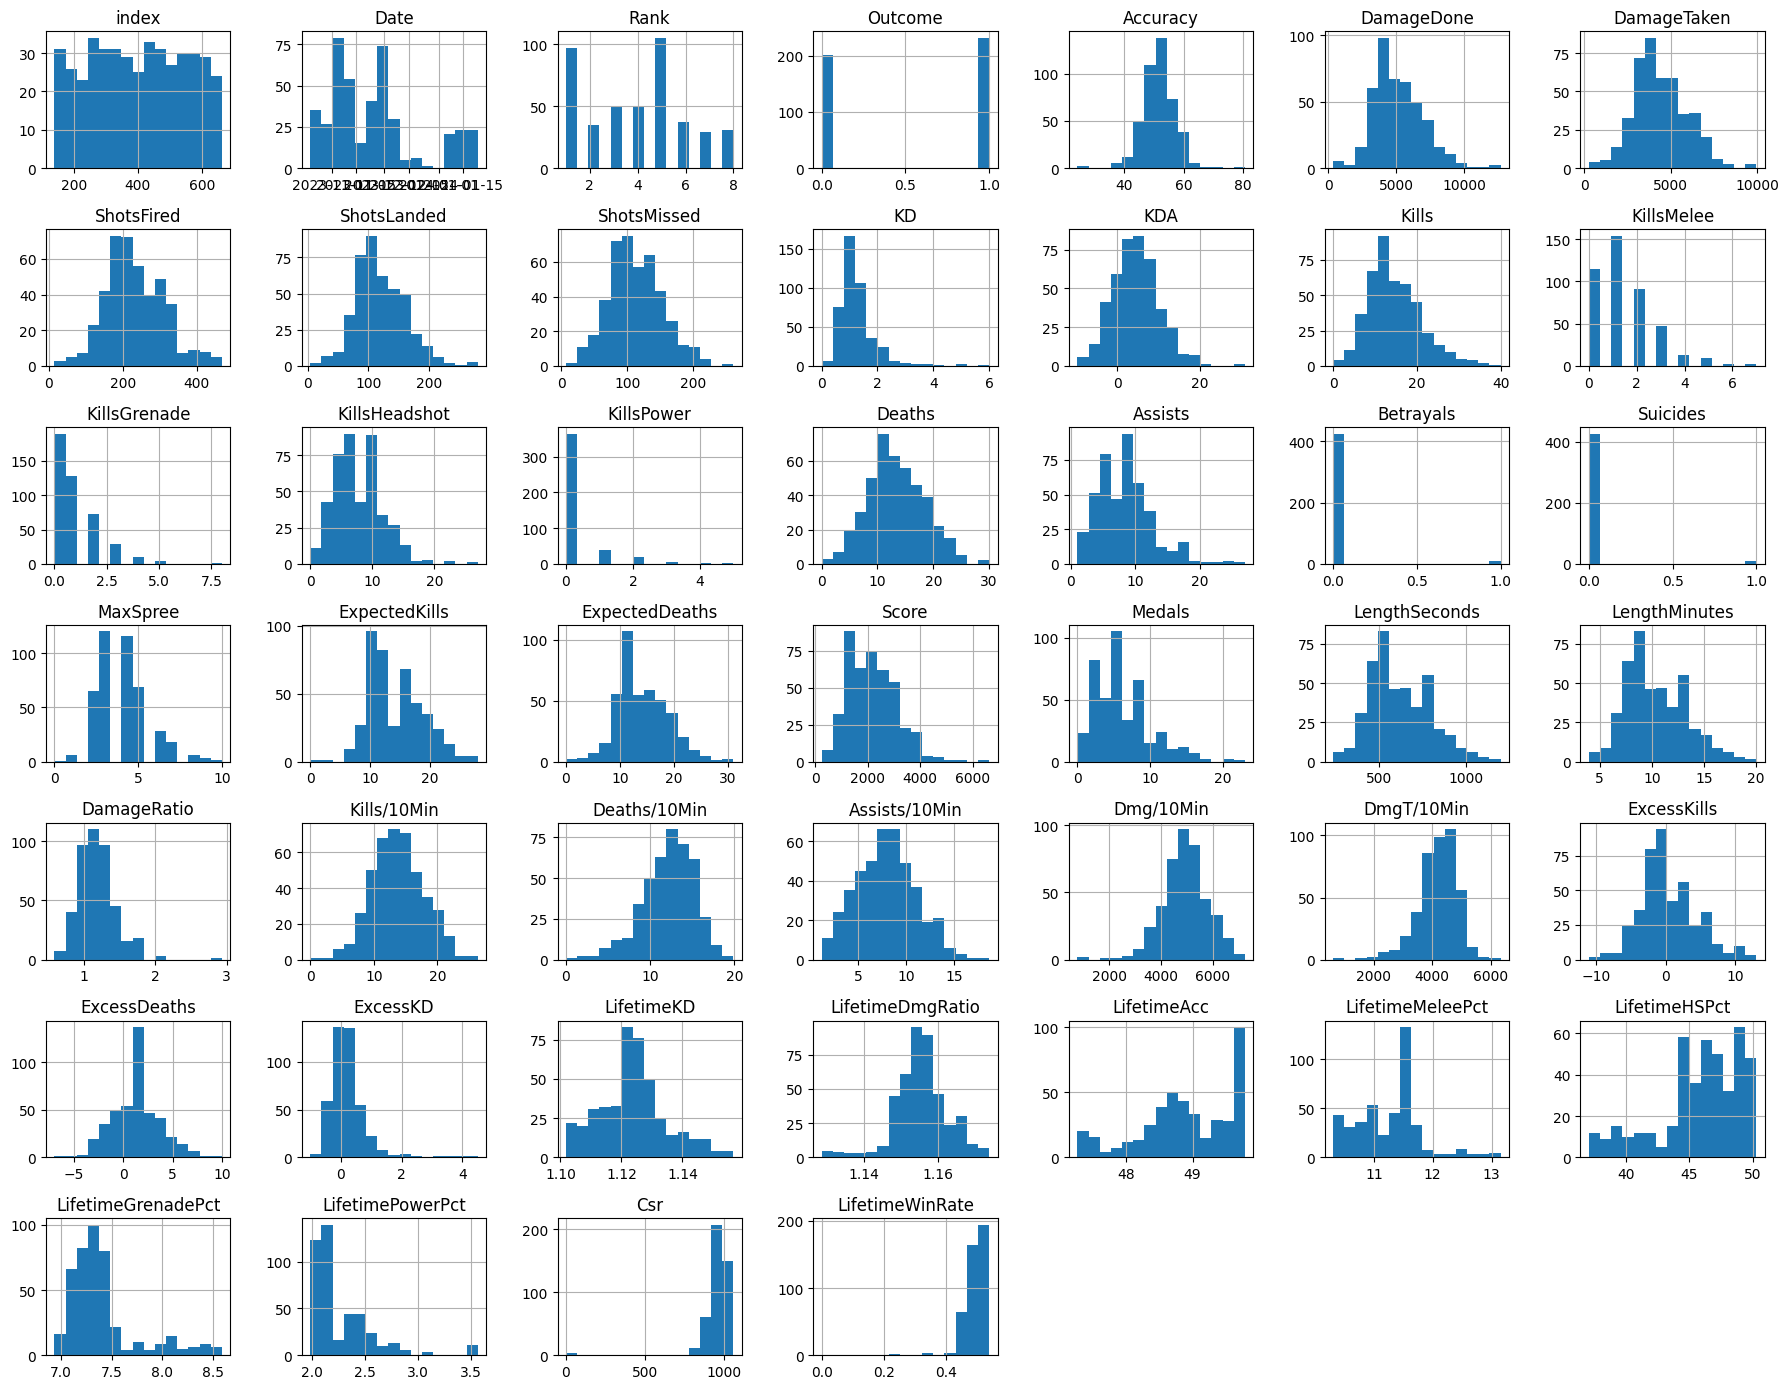

In [112]:
dfr.hist(bins=15, figsize=(18, 14))
plt.tight_layout()
plt.show()

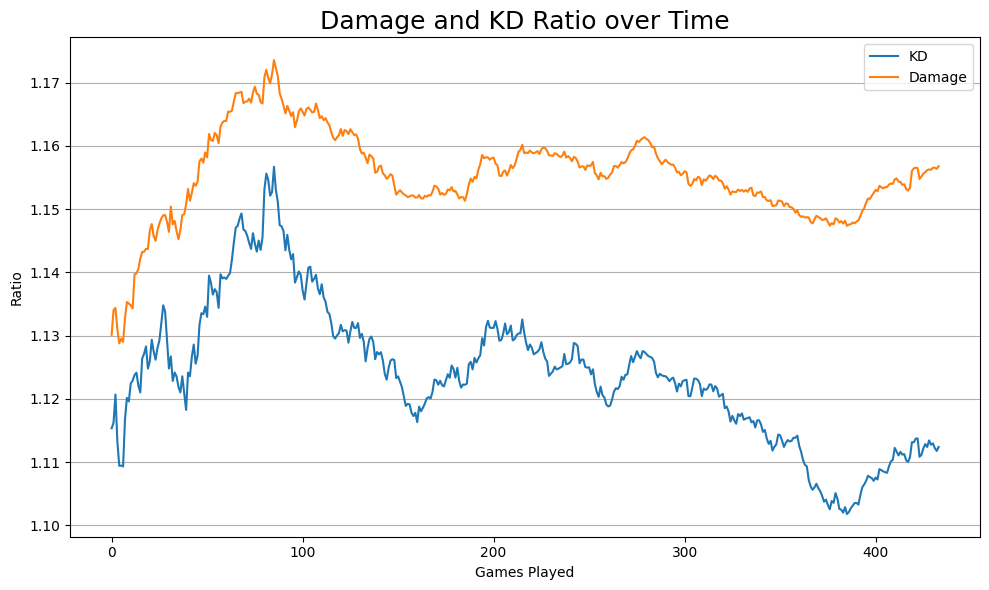

In [113]:
plt.figure(figsize=(10,6))
plt.plot(dfr['LifetimeKD'], label='KD' )
plt.plot(dfr['LifetimeDmgRatio'], label='Damage')
plt.title('Damage and KD Ratio over Time', fontsize=18)
plt.xlabel('Games Played')
plt.ylabel('Ratio')
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig('Plots/DamKDRatios.png', dpi=300)
plt.show()

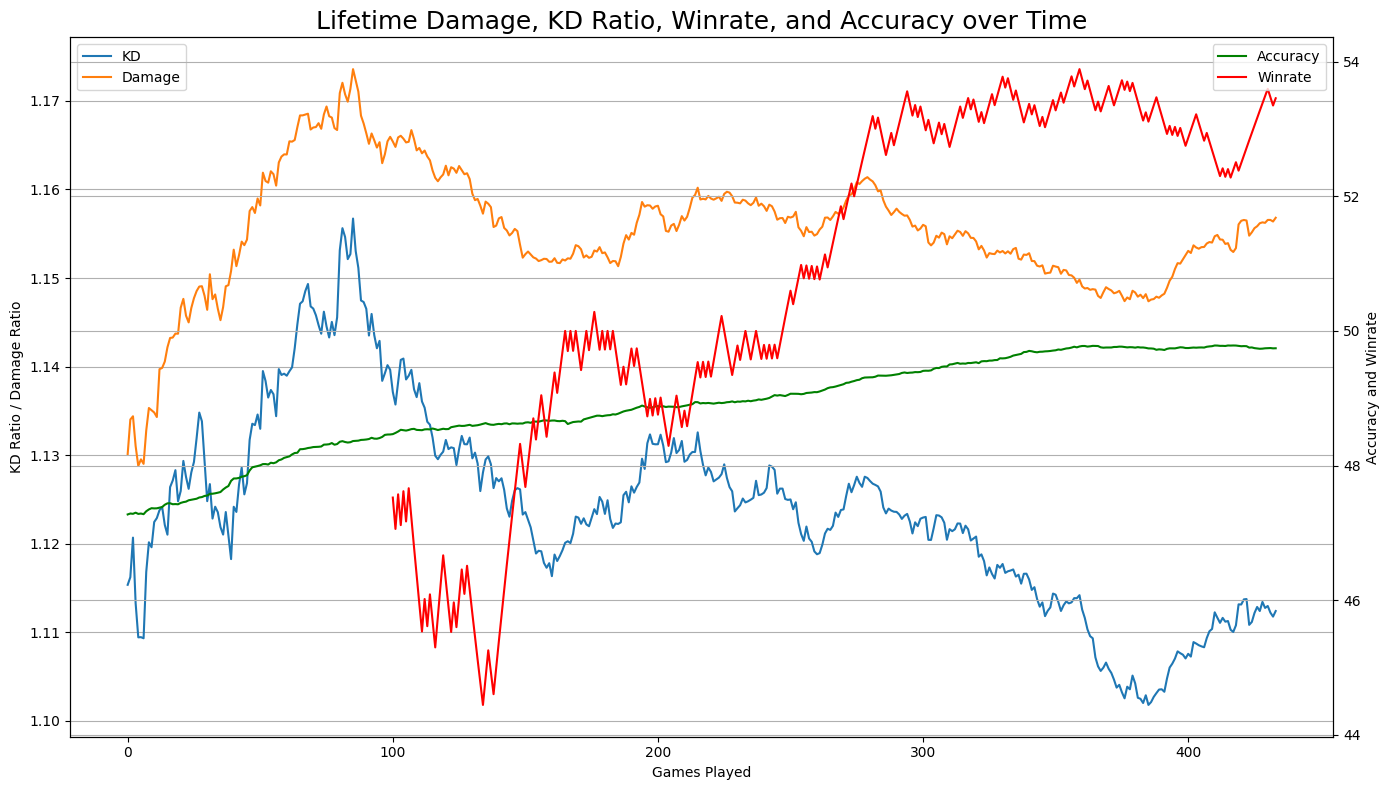

In [114]:
# Smooth the LifetimeWinRate using a 10-game moving average
# dfr['SmoothedAccuracy'] = dfr['Accuracy'].rolling(window=25).mean()

plt.figure(figsize=(14,8))
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(dfr['LifetimeKD'], label='KD' )
ax1.plot(dfr['LifetimeDmgRatio'], label='Damage')
ax2.plot(dfr['LifetimeAcc'], color='green', label='Accuracy')
ax2.plot(dfr['LifetimeWinRate'][100:]*100, color='red', label='Winrate')
ax1.set_title('Lifetime Damage, KD Ratio, Winrate, and Accuracy over Time', fontsize=18)
ax1.set_xlabel('Games Played')
ax1.set_ylabel('KD Ratio / Damage Ratio')
ax2.set_ylabel('Accuracy and Winrate')
# max_y_value = df['LifetimeAcc'].max()
ax1.yaxis.grid(True)
ax2.yaxis.grid(True)
# ax2.set_yticks(np.arange(47, max_y_value, 0.5))
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
# plt.savefig('Plots/DamKDRatiosAcc.png', dpi=300)
plt.show()

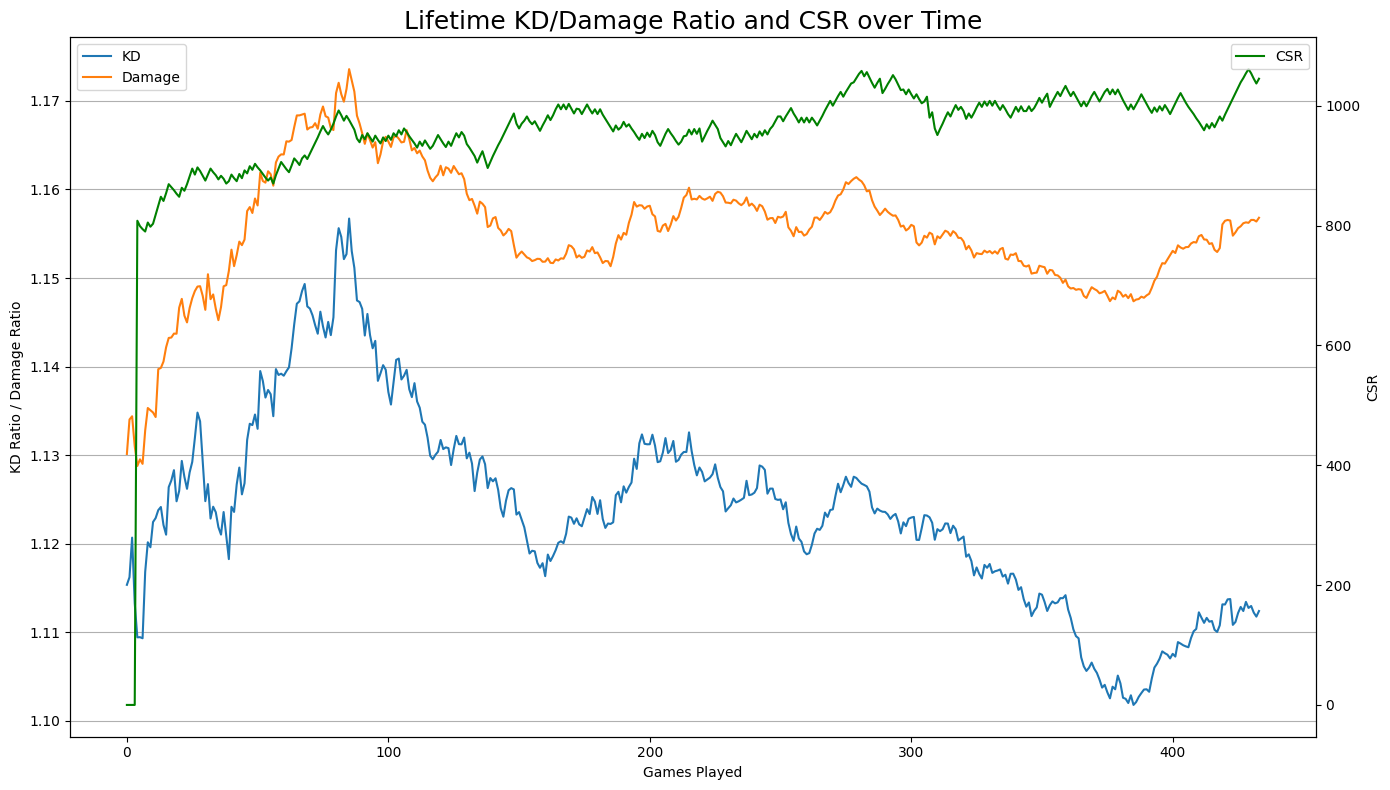

In [115]:
# Smooth the LifetimeWinRate using a 10-game moving average
# dfr['SmoothedAccuracy'] = dfr['Accuracy'].rolling(window=25).mean()

plt.figure(figsize=(14,8))
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(dfr['LifetimeKD'], label='KD' )
ax1.plot(dfr['LifetimeDmgRatio'], label='Damage')
ax2.plot(dfr['Csr'], color='green', label='CSR')
ax1.set_title('Lifetime KD/Damage Ratio and CSR over Time', fontsize=18)
ax1.set_xlabel('Games Played')
ax1.set_ylabel('KD Ratio / Damage Ratio')
ax2.set_ylabel('CSR')
# max_y_value = df['LifetimeAcc'].max()
ax1.yaxis.grid(True)
# ax2.set_yticks(np.arange(47, max_y_value, 0.5))
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
# plt.savefig('Plots/DamKDRatiosAcc.png', dpi=300)
plt.show()

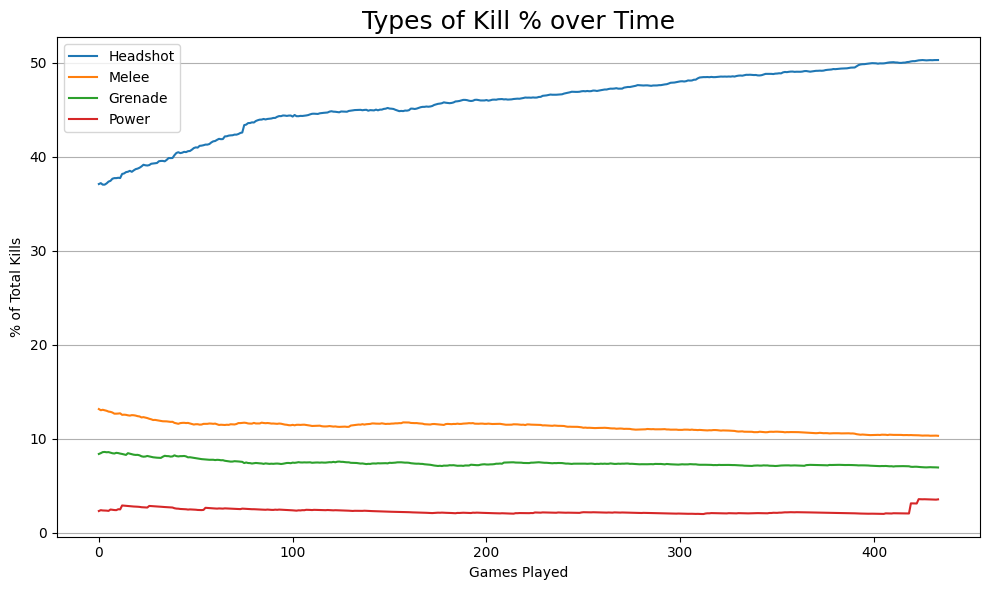

In [135]:
plt.figure(figsize=(10,6))
plt.plot(dfr['LifetimeHSPct'], label='Headshot' )
plt.plot(dfr['LifetimeMeleePct'], label='Melee')
plt.plot(dfr['LifetimeGrenadePct'], label='Grenade')
plt.plot(dfr['LifetimePowerPct'], label='Power')
plt.title('Types of Kill % over Time', fontsize=18)
plt.xlabel('Games Played')
plt.ylabel('% of Total Kills')
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
# plt.savefig('Plots/DamKDRatios.png', dpi=300)
plt.show()

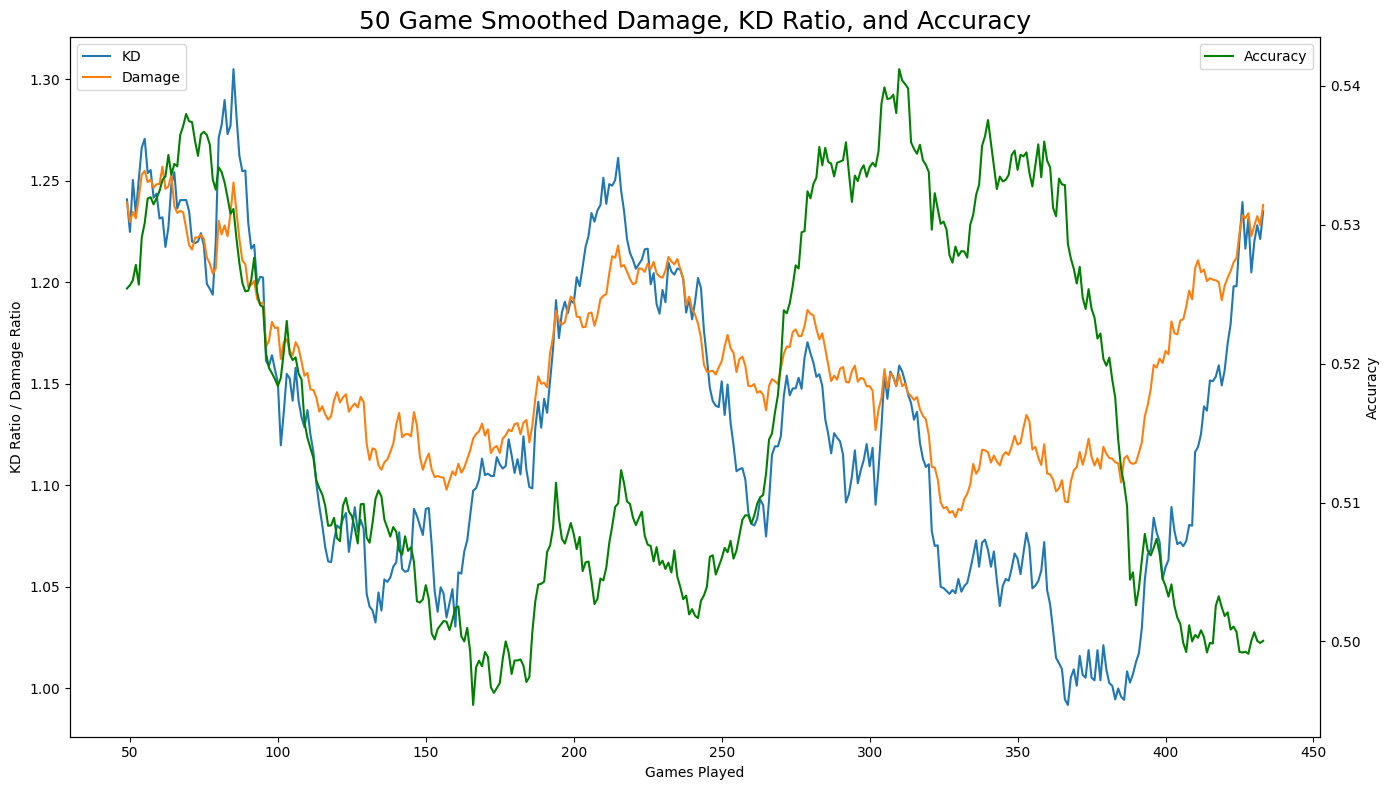

In [117]:
# Smooth the LifetimeWinRate using a 10-game moving average
# Set roll to ** game moving average
roll = 50
dfr['SmoothedAccuracy'] = dfr['ShotsLanded'].rolling(window=roll).sum() / dfr['ShotsFired'].rolling(window=roll).sum()
dfr['SmoothedDmgRatio'] = dfr['DamageDone'].rolling(window=roll).sum() / dfr['DamageTaken'].rolling(window=roll).sum()
dfr['SmoothedKD'] = dfr['Kills'].rolling(window=roll).sum() / dfr['Deaths'].rolling(window=roll).sum()


plt.figure(figsize=(14,8))
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(dfr['SmoothedKD'], label='KD' )
ax1.plot(dfr['SmoothedDmgRatio'], label='Damage')
ax2.plot(dfr['SmoothedAccuracy'], color='green', label='Accuracy')
ax1.set_title(f'{roll} Game Smoothed Damage, KD Ratio, and Accuracy', fontsize=18)
ax1.set_xlabel('Games Played')
ax1.set_ylabel('KD Ratio / Damage Ratio')
ax2.set_ylabel('Accuracy')
max_y_value = df['Accuracy'].max()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.savefig('Plots/DamKDRatiosAccSmooth.png', dpi=300)
plt.show()

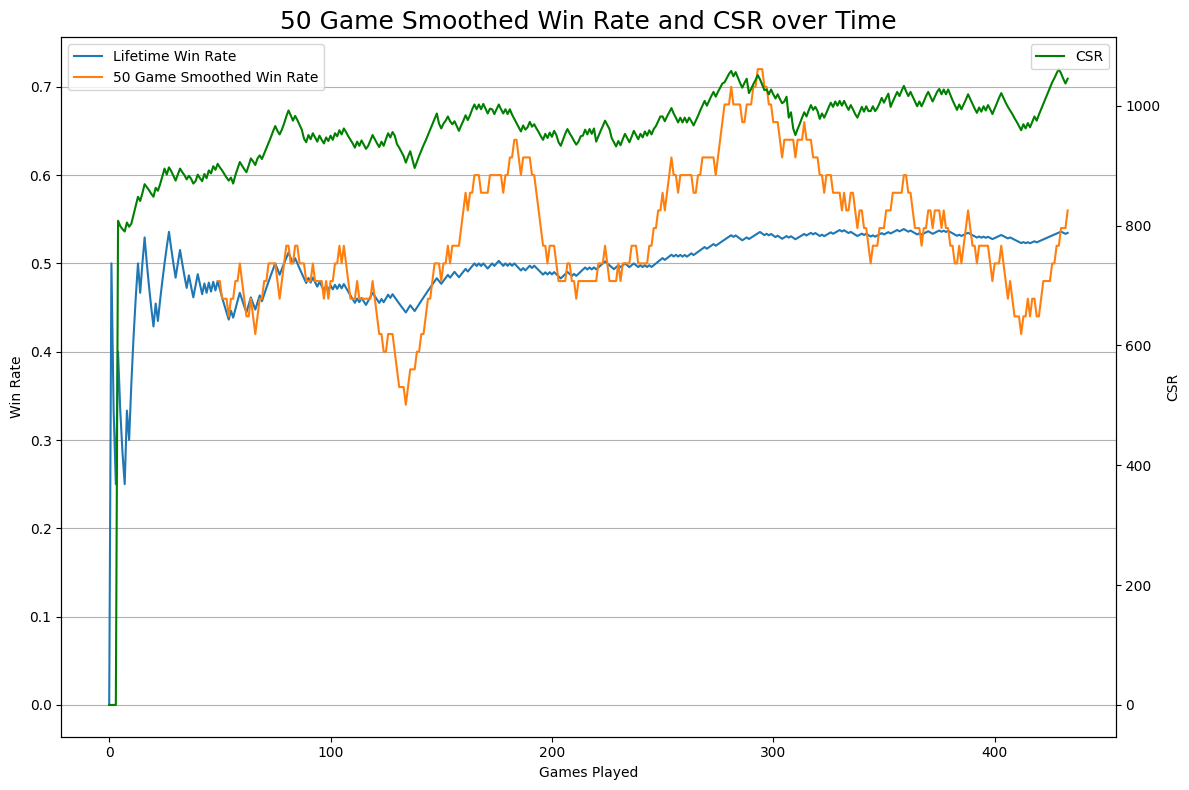

In [118]:
# Smooth the LifetimeWinRate using a 10-game moving average
# dfr['SmoothedWinRate'] = dfr['LifetimeWinRate'].rolling(window=15).mean()
roll = 50
dfr['SmoothedWinRate'] = dfr['Outcome'].rolling(window=roll).sum() / dfr['Outcome'].rolling(window=roll).count()

plt.figure(figsize=(12,8))
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(dfr['LifetimeWinRate'], label='Lifetime Win Rate' )
ax1.plot(dfr['SmoothedWinRate'], label=(f'{roll} Game Smoothed Win Rate'))
ax2.plot(dfr['Csr'], color='green', label='CSR')
ax1.set_title(f'{roll} Game Smoothed Win Rate and CSR over Time', fontsize=18)
ax1.set_xlabel('Games Played')
ax1.set_ylabel('Win Rate')
ax2.set_ylabel('CSR')
ax1.yaxis.grid(True)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.savefig('Plots/WinRateCSR.png', dpi=300)
plt.show()

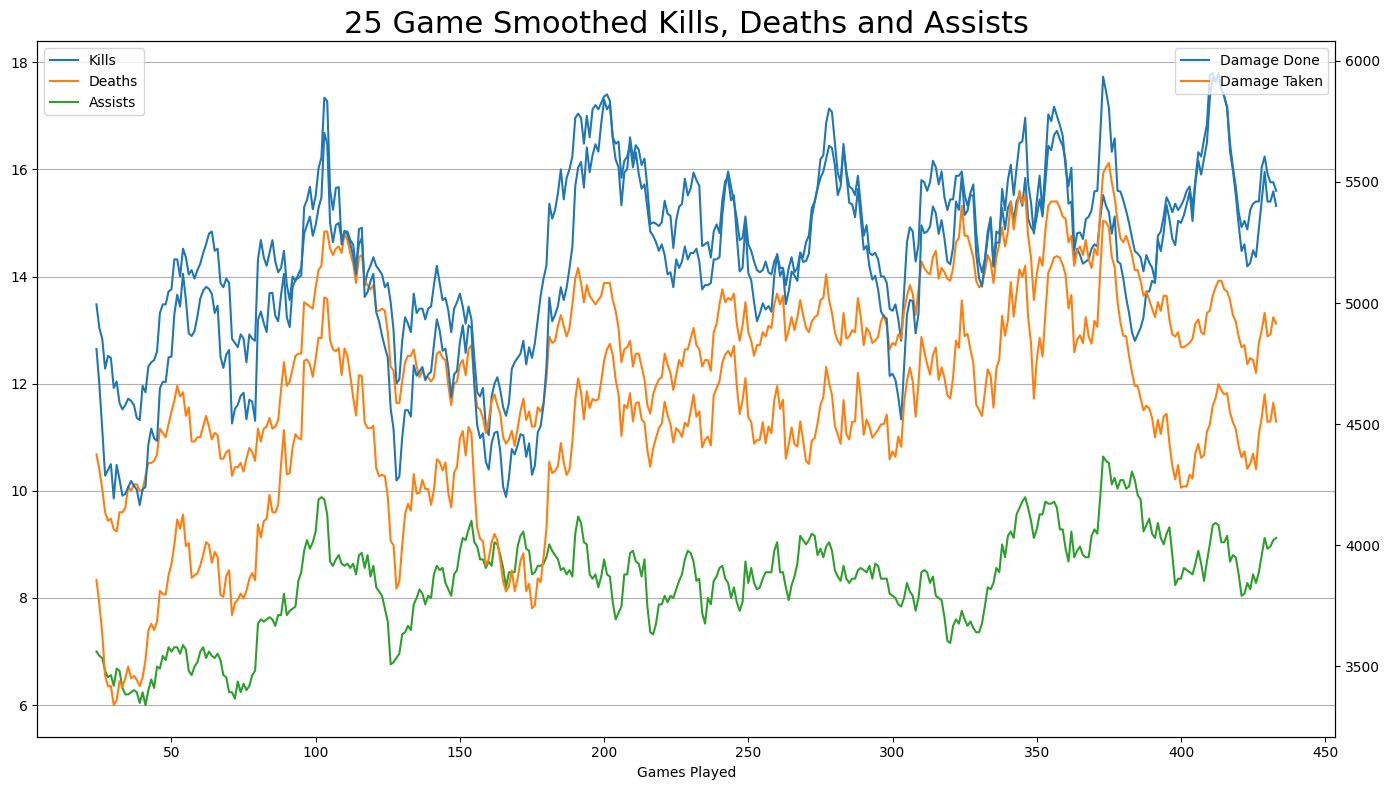

In [119]:
# Smooth the LifetimeWinRate using a 10-game moving average
# Set roll to ** game moving average
roll = 25
dfr['SmoothedKills'] = dfr['Kills'].rolling(window=roll).mean() 
dfr['SmoothedDeaths'] = dfr['Deaths'].rolling(window=roll).mean() 
dfr['SmoothedAssists'] = dfr['Assists'].rolling(window=roll).mean()
dfr['SmoothedDmg'] = dfr['DamageDone'].rolling(window=roll).mean()
dfr['SmoothedDmgT'] = dfr['DamageTaken'].rolling(window=roll).mean()


plt.figure(figsize=(14,8))
ax1 = plt.gca()
ax2 = plt.twinx(ax1)
ax1.plot(dfr['SmoothedKills'], label='Kills' )
ax1.plot(dfr['SmoothedDeaths'], label='Deaths')
ax1.plot(dfr['SmoothedAssists'], label='Assists')
ax2.plot(dfr['SmoothedDmg'], label='Damage Done')
ax2.plot(dfr['SmoothedDmgT'], label='Damage Taken')
ax1.set_title(f'{roll} Game Smoothed Kills, Deaths and Assists', fontsize=22)
ax1.set_xlabel('Games Played')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax2.set_facecolor('red')


ax1.yaxis.grid(True)
plt.tight_layout()
plt.savefig('Plots/KDASmooth.png', dpi=300)
plt.show()

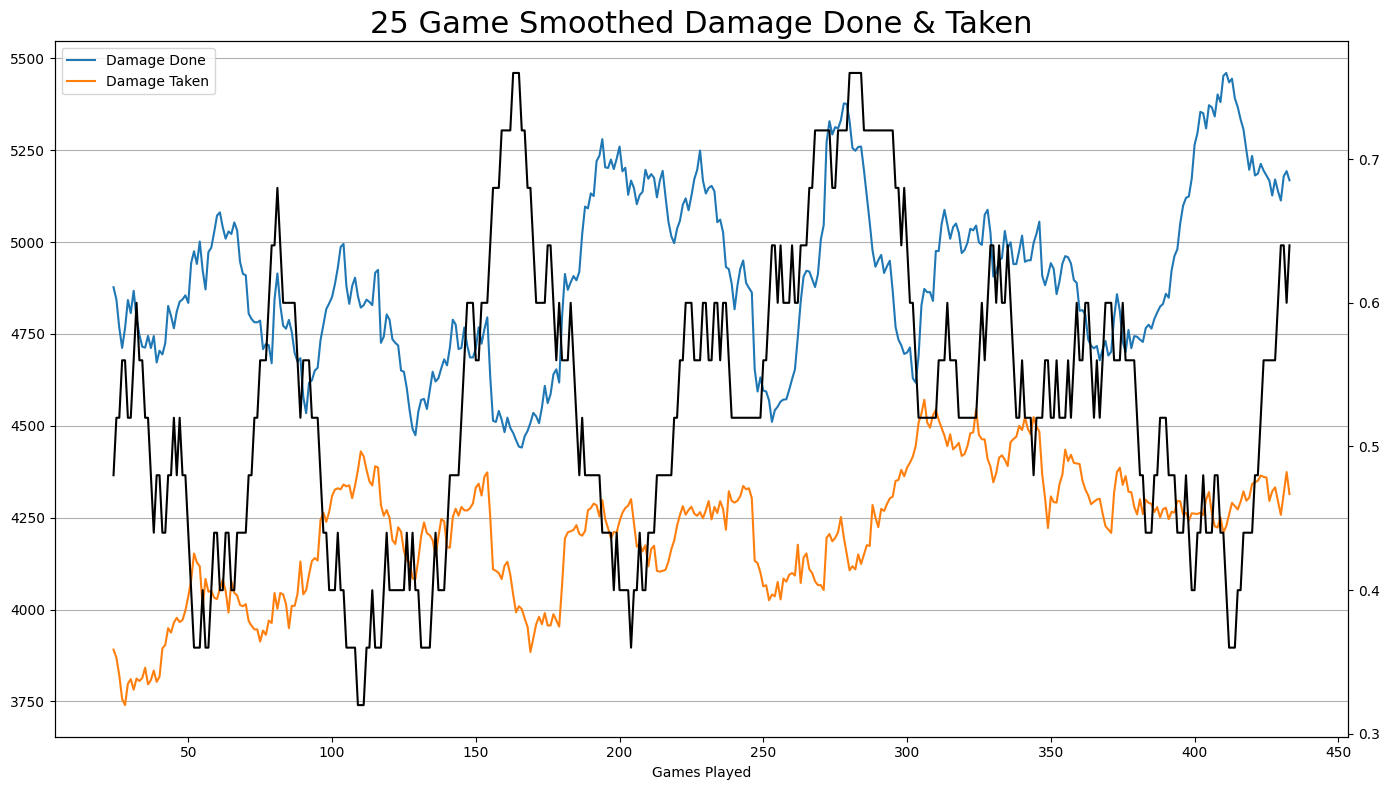

,index,Date,Map,Category,Rank,Outcome,Accuracy,DamageDone,DamageTaken,ShotsFired,...,LifetimeWinRate,SmoothedAccuracy,SmoothedDmgRatio,SmoothedKD,SmoothedWinRate,SmoothedKills,SmoothedDeaths,SmoothedAssists,SmoothedDmg,SmoothedDmgT
0,140,2023-10-19 19:49:41,Solitude,King of the Hill,5,0,52.31,7146,4957,325,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,141,2023-10-19 20:06:10,Solitude,Strongholds,1,1,50.49,7974,5281,309,...,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,142,2023-10-19 20:25:03,Recharge,King of the Hill,5,0,46.36,6889,5906,343,...,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,143,2023-10-19 20:42:40,Streets,Extraction,5,0,53.61,3854,4960,194,...,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,144,2023-10-19 20:55:21,Argyle,CTF 3 Captures,3,1,41.56,2769,3501,231,...,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
# Smooth the LifetimeWinRate using a 10-game moving average
# Set roll to ** game moving average
roll = 25
dfr['SmoothedDmg'] = dfr['Dmg/10Min'].rolling(window=roll).mean()
dfr['SmoothedDmgT'] = dfr['DmgT/10Min'].rolling(window=roll).mean()
dfr['SmoothedWinRate'] = dfr['Outcome'].rolling(window=roll).sum() / dfr['Outcome'].rolling(window=roll).count()

plt.figure(figsize=(14,8))
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(dfr['SmoothedDmg'], label='Damage Done')
ax1.plot(dfr['SmoothedDmgT'], label='Damage Taken')
ax2.plot(dfr['SmoothedWinRate'], label='Winrate', color='black')
ax1.set_title(f'{roll} Game Smoothed Damage Done & Taken', fontsize=22)
ax1.set_xlabel('Games Played')
ax1.legend(loc='upper left')
ax1.yaxis.grid(True)
plt.tight_layout()
plt.savefig('Plots/KDASmooth.png', dpi=300)
plt.show()

dfr.head()

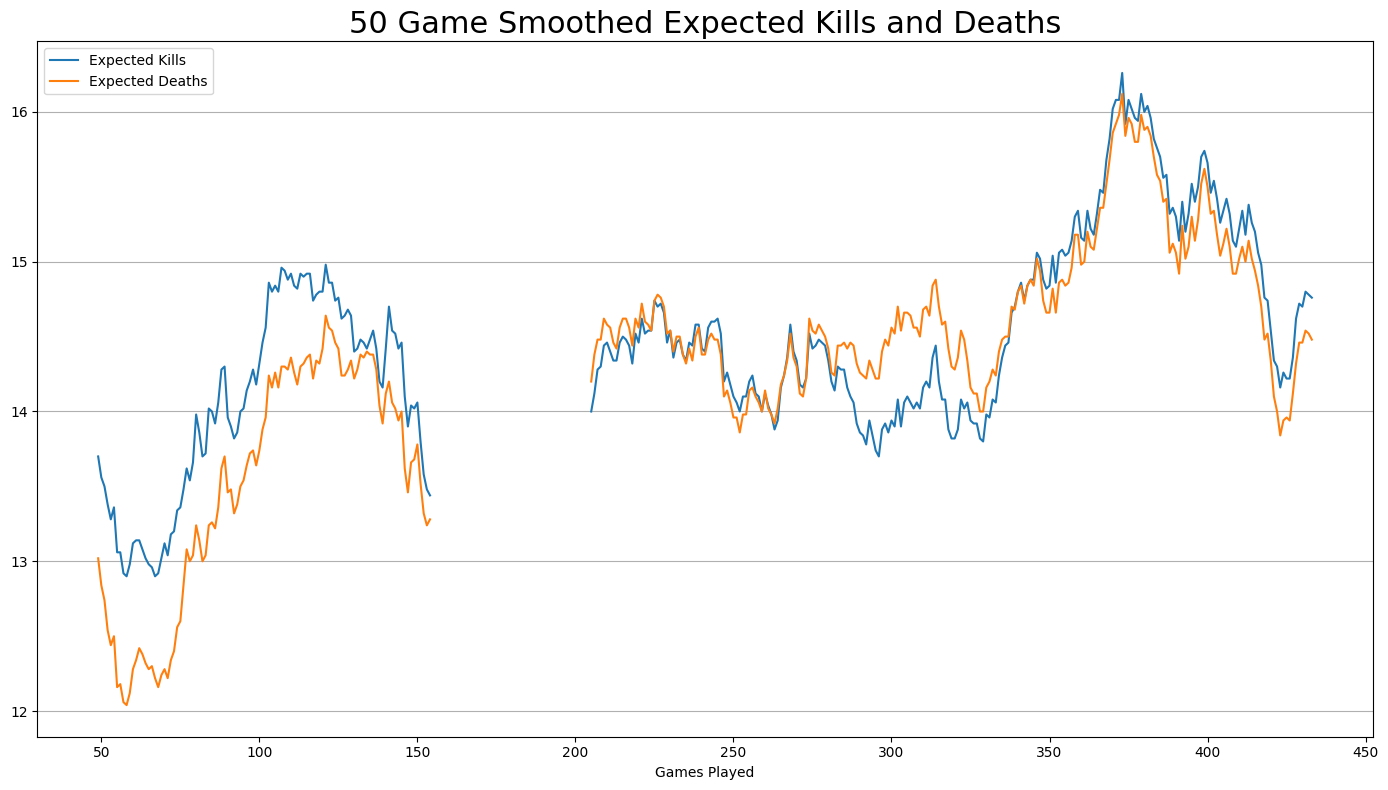

In [121]:
# Smooth the LifetimeWinRate using a 10-game moving average
# Set roll to ** game moving average
roll = 50
dfr['SmoothedExKills'] = dfr['ExpectedKills'].rolling(window=roll).mean()
dfr['SmoothedExDeaths'] = dfr['ExpectedDeaths'].rolling(window=roll).mean()

plt.figure(figsize=(14,8))
ax1 = plt.gca()
ax1.plot(dfr['SmoothedExKills'], label='Expected Kills')
ax1.plot(dfr['SmoothedExDeaths'], label='Expected Deaths')
ax1.set_title(f'{roll} Game Smoothed Expected Kills and Deaths', fontsize=22)
ax1.set_xlabel('Games Played')
ax1.legend(loc='upper left')
ax1.yaxis.grid(True)
plt.tight_layout()
plt.savefig('Plots/ExKDSmooth.png', dpi=300)
plt.show()

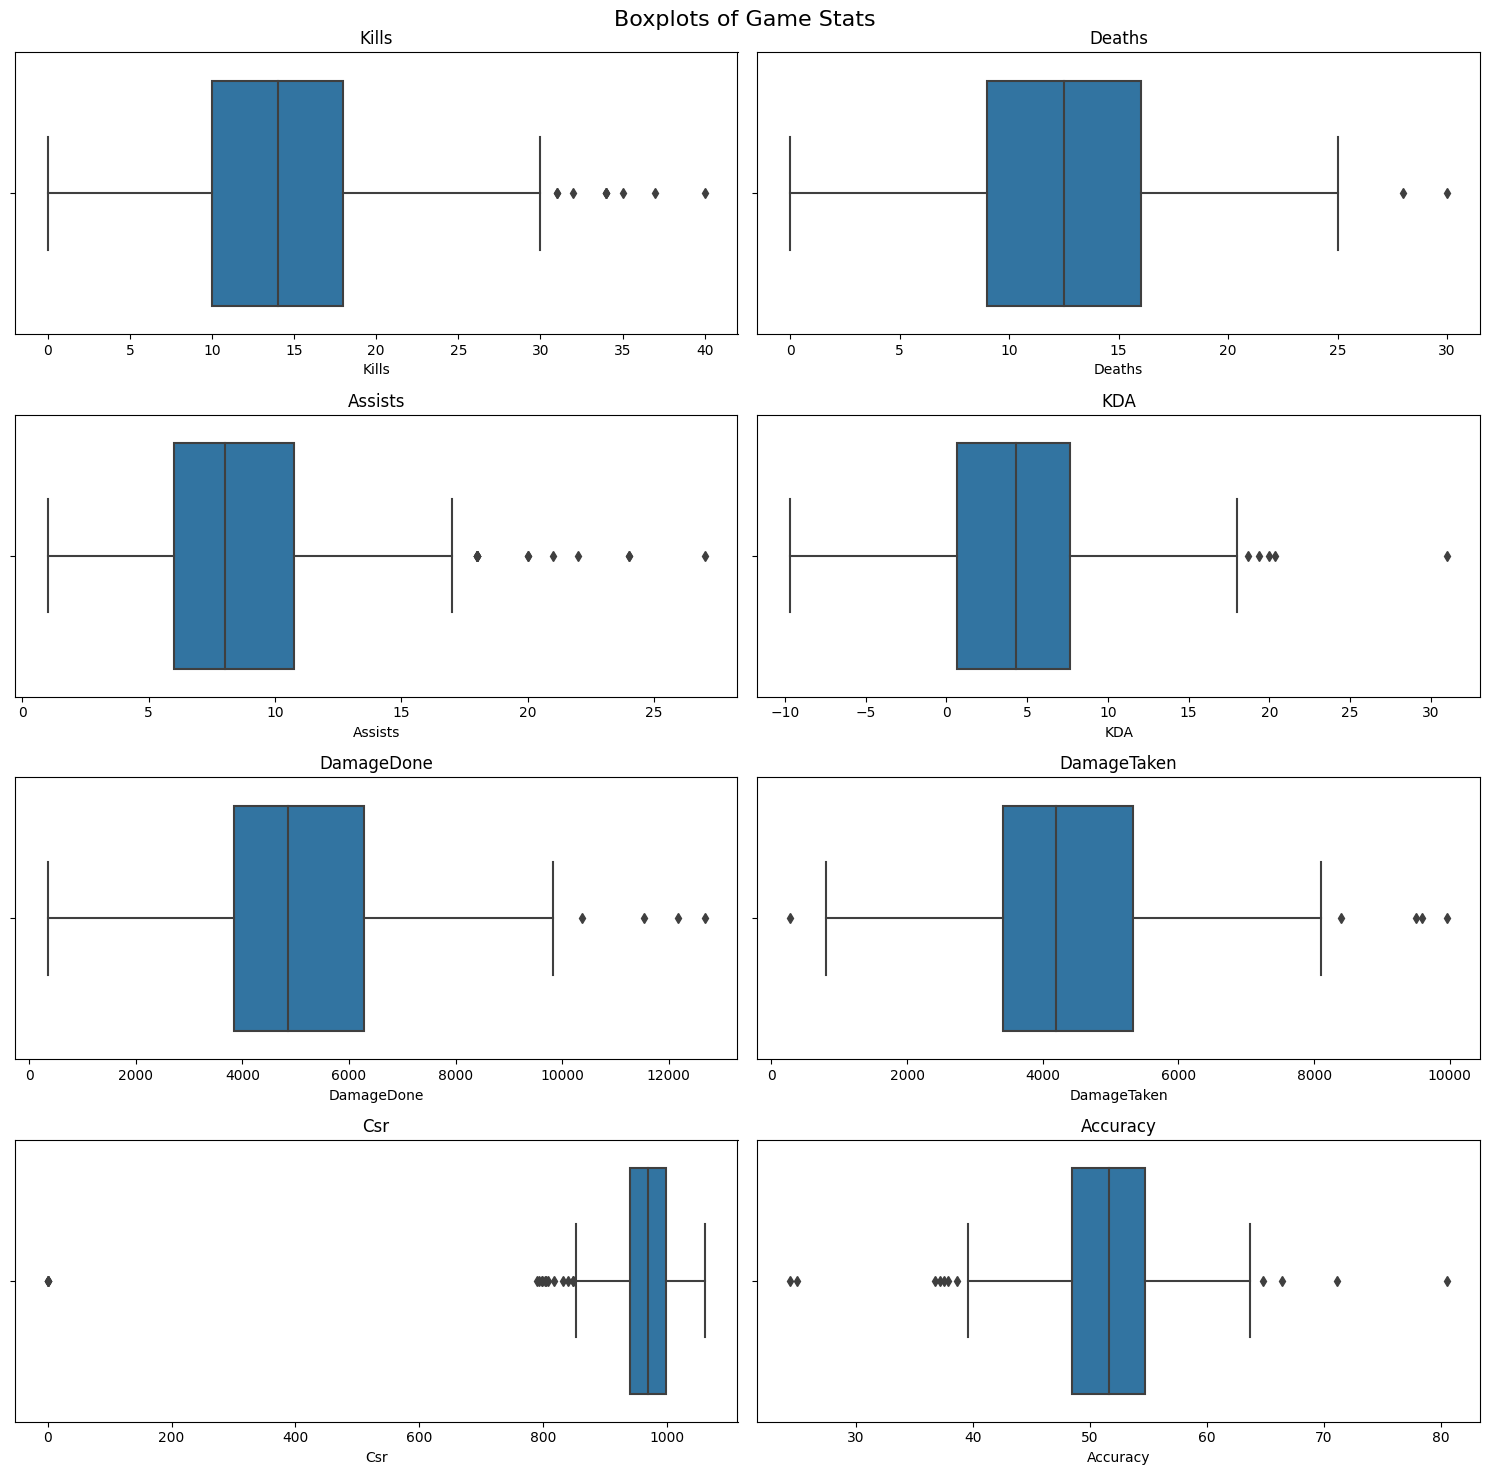

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
columns = ['Kills', 'Deaths', 'Assists', 'KDA', 'DamageDone', 'DamageTaken',
            'Csr', 'Accuracy']

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot each column in a separate boxplot
for i, column in enumerate(columns):
    sns.boxplot(x=dfr[column], ax=axes[i])
    axes[i].set_title(column)

# Adjust layout
plt.suptitle('Boxplots of Game Stats', fontsize=16)
plt.tight_layout()
plt.savefig('Plots/Boxplots.png', dpi=300)
plt.show()


In [123]:
mod = 5

# dfmod = dfr.loc[dfr['Deaths'] < mod, 
#                 ['Kills', 'Deaths', 'KD', 'DamageDone', 'DamageTaken', 'DamageRatio', 'Outcome']
#                 ].sort_values('DamageDone', ascending=False)

# Column Choice <>
# dfmod = dfr.loc[dfr['Deaths'] < mod]

# Last * Games
dfmod = dfr.tail(mod)

# print(dfmod.head())
print(f'Overall KD: {round(dfmod["Kills"].sum() / dfmod["Deaths"].sum(),2)}')
print(f"Accuracy: {round(dfmod['ShotsLanded'].sum() / dfmod['ShotsFired'].sum()*100,2)}")
print(f"Damage Ratio: {round(dfmod['DamageDone'].sum() / dfmod['DamageTaken'].sum(),2)}")
print(f"Win-Loss: {(dfmod['Outcome']==1).sum()}-{(dfmod['Outcome']==0).sum()}")
print(f"Max CSR: {dfmod['Csr'].max()}")

Overall KD: 1.01
Accuracy: 50.35
Damage Ratio: 1.21
Win-Loss: 3-2
Max CSR: 1061


In [124]:
dfw = dfr.loc[dfr['Outcome'] == 1, 
                ['Kills', 'Deaths', 'Assists', 'KD', 'DamageDone', 'DamageTaken', 'DamageRatio', 'Outcome', 'ShotsFired', 'ShotsLanded']
                ].sort_values('Kills', ascending=False)

dfl = dfr.loc[dfr['Outcome'] == 0, 
                ['Kills', 'Deaths', 'Assists', 'KD', 'DamageDone', 'DamageTaken', 'DamageRatio', 'Outcome', 'ShotsFired', 'ShotsLanded']
                ].sort_values('Kills', ascending=False)

print('Overall')
print(f'Overall KD: {round(dfr["Kills"].sum() / dfr["Deaths"].sum(),2)}')
print(f"Average Kills: {round(dfr['Kills'].mean(),2)}")
print(f"Average Deaths: {round(dfr['Deaths'].mean(),2)}")
print(f"Average Assists: {round(dfr['Assists'].mean(),2)}")
print(f"Average Accuracy: {round(dfr['ShotsLanded'].sum() / dfr['ShotsFired'].sum() *100,2)}")
print(f"Average Damage Done: {round(dfr['DamageDone'].mean(),)}")
print(f"Average Damage Taken: {round(dfr['DamageTaken'].mean(),)}")
print(f"Damage Ratio: {round(dfr['DamageDone'].sum() / dfr['DamageTaken'].sum(),2)}")
print(f"Win-Loss: {(dfr['Outcome']==1).sum()}-{(dfr['Outcome']==0).sum()}")
print('----------------------------')
print('Wins')
print(f'Overall KD: {round(dfw["Kills"].sum() / dfw["Deaths"].sum(),2)}')
print(f"Average Kills: {round(dfw['Kills'].mean(),2)}")
print(f"Average Deaths: {round(dfw['Deaths'].mean(),2)}")
print(f"Average Assists: {round(dfw['Assists'].mean(),2)}")
print(f"Average Accuracy: {round(dfw['ShotsLanded'].sum() / dfw['ShotsFired'].sum() *100,2)}")
print(f"Average Damage Done: {round(dfw['DamageDone'].mean(),)}")
print(f"Average Damage Taken: {round(dfw['DamageTaken'].mean(),)}")
print(f"Damage Ratio: {round(dfw['DamageDone'].sum() / dfw['DamageTaken'].sum(),2)}")
print(f"Wins: {(dfw['Outcome']==1).sum()}")
print('----------------------------')
print('Losses')
print(f'Overall KD: {round(dfl["Kills"].sum() / dfl["Deaths"].sum(),2)}')
print(f"Average Kills: {round(dfl['Kills'].mean(),2)}")
print(f"Average Deaths: {round(dfl['Deaths'].mean(),2)}")
print(f"Average Assists: {round(dfl['Assists'].mean(),2)}")
print(f"Average Accuracy: {round(dfl['ShotsLanded'].sum() / dfl['ShotsFired'].sum() *100,2)}")
print(f"Average Damage Done: {round(dfl['DamageDone'].mean(),)}")
print(f"Average Damage Taken: {round(dfl['DamageTaken'].mean(),)}")
print(f"Damage Ratio: {round(dfl['DamageDone'].sum() / dfl['DamageTaken'].sum(),2)}")
print(f"Losses: {(dfl['Outcome']==0).sum()}")

Overall
Overall KD: 1.13
Average Kills: 14.55
Average Deaths: 12.85
Average Assists: 8.31
Average Accuracy: 51.51
Average Damage Done: 5144
Average Damage Taken: 4413
Damage Ratio: 1.17
Win-Loss: 232-202
----------------------------
Wins
Overall KD: 1.27
Average Kills: 14.32
Average Deaths: 11.28
Average Assists: 8.45
Average Accuracy: 51.68
Average Damage Done: 4970
Average Damage Taken: 4062
Damage Ratio: 1.22
Wins: 232
----------------------------
Losses
Overall KD: 1.01
Average Kills: 14.82
Average Deaths: 14.64
Average Assists: 8.15
Average Accuracy: 51.33
Average Damage Done: 5344
Average Damage Taken: 4816
Damage Ratio: 1.11
Losses: 202


In [125]:
mapCatKD = dfr.pivot_table(index=['Category', 'Map'], 
                        values=['Kills', 'Deaths', 'Assists', 'Accuracy', 'DamageRatio', 'Outcome'], 
                        aggfunc='mean')

avg_k = dfr['Kills'].mean()
avg_d = dfr['Deaths'].mean()
avg_a = dfr['Assists'].mean()
avg_kd= round(dfr['Kills'].sum() / dfr['Deaths'].sum(),2)

mapCatKD['ExKills'] = mapCatKD['Kills'] - avg_k
mapCatKD['ExDeaths'] = mapCatKD['Deaths'] - avg_d
mapCatKD['ExAssists'] = mapCatKD['Assists'] - avg_a

mapCatKD['KD'] = mapCatKD['Kills'] / mapCatKD['Deaths']
mapCatKD['ExKD'] = mapCatKD['KD'] - avg_kd

desired_col_order = ['Kills','ExKills', 'Deaths', 'ExDeaths', 'Assists', 'ExAssists', 'KD', 'ExKD', 'Accuracy', 'DamageRatio', 'Outcome']

# Reindex the pivot table with the desired column order
mapCatKD = mapCatKD.reindex(desired_col_order, axis=1)
mapCatKD = mapCatKD.round(2)

mapCatKD.sort_values('Outcome', ascending=False)

Kills  ExKills  Deaths  ExDeaths  Assists  \
Category         Map                                                    
King of the Hill Live Fire  14.30    -0.25   13.05      0.20     6.70   
Slayer           Streets     9.43    -5.12    8.64     -4.20     6.79   
CTF 3 Captures   Forbidden  14.77     0.22   10.00     -2.85     5.62   
Oddball          Live Fire  15.56     1.00   15.67      2.82    11.00   
Extraction       Recharge   12.78    -1.78   10.72     -2.12     7.94   
                 Streets    13.73    -0.83   10.64     -2.21     7.67   
Slayer           Aquarius   10.71    -3.84   10.00     -2.85     6.40   
                 Recharge    9.20    -5.35    9.30     -3.55     7.30   
King of the Hill Recharge   18.19     3.63   15.96      3.12    12.19   
Slayer           Solitude   10.84    -3.71   11.13     -1.72     6.55   
Strongholds      Live Fire  15.39     0.84   13.00      0.15     6.44   
Oddball          Streets    17.57     3.02   15.86      3.01    10.89   
King of the Hill Solitude   20.25     5.70   14.08      1.24     9.75   
CTF 3 Captures   Argyle     14.12    -0.44   12.65     -0.20     6.53   
Oddball          Recharge   16.16     1.60   13.68      0.84     9.68   
Extraction       Live Fire  12.11    -2.45   11.37     -1.48     6.58   
Slayer           Live Fire  10.20    -4.35   10.20     -2.65     5.27   
Strongholds      Recharge   14.60     0.05   14.65      1.80     9.55   
CTF 3 Captures   Empyrean   14.61     0.06   13.83      0.99     8.28   
Strongholds      Solitude   19.16     4.61   16.45      3.61    10.94   
CTF 5 Captures   Aquarius   19.89     5.34   15.28      2.43     9.28   

                            ExAssists    KD  ExKD  Accuracy  DamageRatio  \
Category         Map                                                       
King of the Hill Live Fire      -1.61  1.10 -0.03     54.93         1.12   
Slayer           Streets        -1.53  1.09 -0.04     49.23         1.17   
CTF 3 Captures   Forbidden      -2.70  1.48  0.35     54.60         1.50   
Oddball          Live Fire       2.69  0.99 -0.14     51.49         1.21   
Extraction       Recharge       -0.37  1.19  0.06     51.79         1.28   
                 Streets        -0.65  1.29  0.16     54.61         1.27   
Slayer           Aquarius       -1.91  1.07 -0.06     51.02         1.16   
                 Recharge       -1.01  0.99 -0.14     48.02         1.13   
King of the Hill Recharge        3.87  1.14  0.01     50.03         1.19   
Slayer           Solitude       -1.76  0.97 -0.16     50.66         1.10   
Strongholds      Live Fire      -1.87  1.18  0.05     52.35         1.13   
Oddball          Streets         2.58  1.11 -0.02     53.39         1.18   
King of the Hill Solitude        1.44  1.44  0.31     52.14         1.27   
CTF 3 Captures   Argyle         -1.78  1.12 -0.01     48.90         1.21   
Oddball          Recharge        1.37  1.18  0.05     49.46         1.20   
Extraction       Live Fire      -1.73  1.06 -0.07     55.58         1.16   
Slayer           Live Fire      -3.05  1.00 -0.13     48.74         1.06   
Strongholds      Recharge        1.24  1.00 -0.13     48.72         1.16   
CTF 3 Captures   Empyrean       -0.04  1.06 -0.07     50.69         1.15   
Strongholds      Solitude        2.62  1.16  0.03     52.30         1.18   
CTF 5 Captures   Aquarius        0.96  1.30  0.17     51.36         1.29   

                            Outcome  
Category         Map                 
King of the Hill Live Fire     0.75  
Slayer           Streets       0.71  
CTF 3 Captures   Forbidden     0.69  
Oddball          Live Fire     0.61  
Extraction       Recharge      0.61  
                 Streets       0.61  
Slayer           Aquarius      0.60  
                 Recharge      0.60  
King of the Hill Recharge      0.59  
Slayer           Solitude      0.58  
Strongholds      Live Fire     0.56  
Oddball          Streets       0.54  
King of the Hill Solitude      0.50  
CTF 3 Captures   Argyle      

In [126]:
mapKD = dfr.pivot_table(index='Map', 
                        values=['Kills', 'Deaths', 'Assists', 'Accuracy', 'KD', 'DamageRatio', 'Outcome'], 
                        aggfunc='mean')

desired_col_order = ['Kills', 'Deaths', 'KD', 'Assists', 'Accuracy', 'DamageRatio', 'Outcome']

# Reindex the pivot table with the desired column order
mapKD = mapKD.reindex(desired_col_order, axis=1)
mapKD = mapKD.round(2)

mapKD

,Kills,Deaths,KD,Assists,Accuracy,DamageRatio,Outcome
Map,,,,,,,
Aquarius,13.83,11.79,1.26,7.38,51.14,1.20,0.51
Argyle,14.12,12.65,1.19,6.53,48.90,1.21,0.47
Empyrean,14.61,13.83,1.13,8.28,50.69,1.15,0.39
Forbidden,14.77,10.00,1.80,5.62,54.60,1.50,0.69
Live Fire,13.62,12.73,1.22,7.24,52.83,1.14,0.56
Recharge,15.02,13.51,1.25,9.79,49.76,1.20,0.53
Solitude,15.85,13.84,1.22,8.91,51.59,1.16,0.49
Streets,14.36,12.21,1.23,8.71,53.15,1.22,0.60


In [127]:
catKD = dfr.pivot_table(index='Category', 
                        values=['Kills', 'Deaths', 'Accuracy', 'KD', 'DamageRatio', 'Outcome', 'Assists'], 
                        aggfunc='mean')

desired_col_order = ['Kills', 'Deaths', 'Assists', 'KD', 'Accuracy', 'DamageRatio', 'Outcome']

# Reindex the pivot table with the desired column order
catKD = catKD.reindex(desired_col_order, axis=1)
catKD = catKD.round(2)

catKD

,Kills,Deaths,Assists,KD,Accuracy,DamageRatio,Outcome
Category,,,,,,,
CTF 3 Captures,14.48,12.38,6.94,1.33,51.11,1.27,0.50
CTF 5 Captures,19.89,15.28,9.28,1.44,51.36,1.29,0.33
Extraction,13.04,10.86,7.44,1.34,54.15,1.24,0.56
King of the Hill,17.29,14.59,9.83,1.27,52.12,1.18,0.63
Oddball,16.60,15.17,10.57,1.20,51.71,1.20,0.54
Slayer,10.36,10.11,6.42,1.16,50.07,1.12,0.58
Strongholds,16.86,15.03,9.36,1.19,51.28,1.16,0.43


In [128]:
dfrc = dfr.groupby('Category').agg({'LengthMinutes': 'sum', 'Category': 'count'})
dfrc.rename(columns={'Category': 'Count'}, inplace=True)
dfrc['LengthHours'] = round(dfrc['LengthMinutes'] / 60,2)
dfrc['LengthMinutes'] = round(dfrc['LengthMinutes'],2)
dfrc['Length%'] = round(dfrc['LengthMinutes'] / dfrc['LengthMinutes'].sum() * 100,2)
dfrc['Count%'] = round(dfrc['Count'] / dfrc['Count'].sum() * 100,2)
dfrc['TimeMultiple'] = dfrc['Length%'] - dfrc['Count%']
dfrc.sort_values('Length%', ascending=False)

,LengthMinutes,Count,LengthHours,Length%,Count%,TimeMultiple
Category,,,,,,
Slayer,906.08,105,15.10,20.15,24.19,-4.04
Strongholds,810.98,69,13.52,18.04,15.90,2.14
Oddball,775.22,65,12.92,17.24,14.98,2.26
King of the Hill,635.73,59,10.60,14.14,13.59,0.55
Extraction,611.85,70,10.20,13.61,16.13,-2.52
CTF 3 Captures,527.50,48,8.79,11.73,11.06,0.67
CTF 5 Captures,228.42,18,3.81,5.08,4.15,0.93


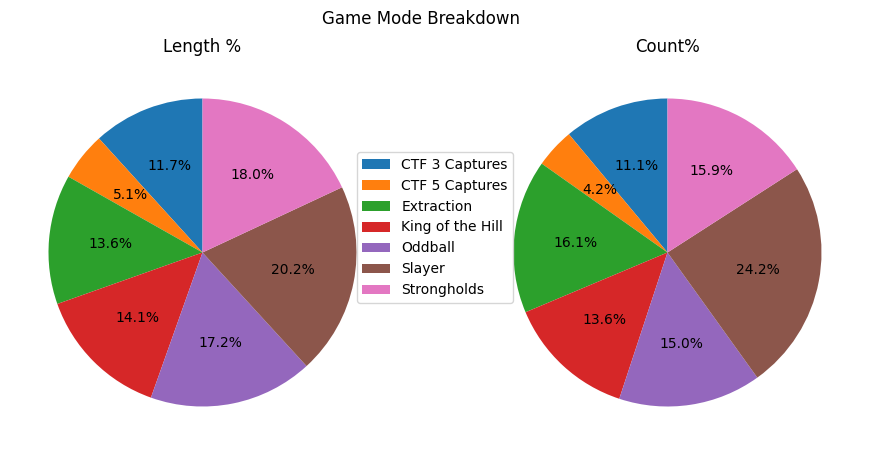

In [129]:
import matplotlib.pyplot as plt

labels = dfrc.index.get_level_values('Category').tolist()
sizes_length = dfrc['Length%'].tolist()
sizes_count = dfrc['Count%'].tolist()

fig, ax = plt.subplots(1, 2, figsize=(11, 5))  # Create a subplot with 1 row and 2 columns
ax[0].pie(sizes_length, labels=None, autopct='%1.1f%%', startangle=90)
ax[1].pie(sizes_count, labels=None, autopct='%1.1f%%', startangle=90)
fig.suptitle('Game Mode Breakdown')
ax[0].set(aspect="equal", title='Length %')
ax[1].set(aspect="equal", title='Count%')
fig.legend(labels, loc="center")

plt.show()

In [130]:
dfrc = dfr.groupby(['Category','Map']).agg({'Category': 'count', 'LengthMinutes': 'sum', 'Outcome': 'mean'})
dfrc.rename(columns={'Category': 'Count', 'LengthMinutes': 'LengthHours'}, inplace=True)
dfrc['LengthHours'] = round(dfrc['LengthHours']/60,2)
dfrc['Outcome'] = round(dfrc['Outcome'],2)
dfrc['Count%'] = round(dfrc['Count'] / dfrc['Count'].sum() * 100,2)
dfrc['Length%'] = round(dfrc['LengthHours'] / dfrc['LengthHours'].sum() * 100,2)
dfrc = dfrc.sort_values(['Length%'], ascending=False)
dfrc

,,Count,LengthHours,Outcome,Count%,Length%
Category,Map,,,,,
Strongholds,Solitude,31,6.49,0.39,7.14,8.66
Oddball,Streets,28,5.64,0.54,6.45,7.53
King of the Hill,Recharge,27,5.29,0.59,6.22,7.06
Slayer,Aquarius,35,4.98,0.60,8.06,6.65
Extraction,Streets,33,4.74,0.61,7.60,6.33
Slayer,Solitude,31,4.58,0.58,7.14,6.11
CTF 5 Captures,Aquarius,18,3.81,0.33,4.15,5.08
Strongholds,Recharge,20,3.77,0.40,4.61,5.03
Oddball,Recharge,19,3.73,0.47,4.38,4.98


In [131]:
dfrcc = dfr.groupby(['Category','Map']).agg({'Category': 'count',
                                             'Kills' : 'sum',
                                             'Deaths' : 'sum',
                                             'Assists' : 'sum',
                                             'ShotsLanded' : 'sum',
                                             'ShotsFired' : 'sum',
                                             'DamageDone': 'sum',
                                             'DamageTaken': 'sum',
                                             'Outcome': 'mean',
                                             'LengthMinutes': 'sum',
                                             })
dfrcc.rename(columns={'Category': 'Count', 'Outcome': 'Winrate'}, inplace=True)
dfrcc['Accuracy'] = (dfrcc['ShotsLanded'] / dfrcc['ShotsFired']) *100
dfrcc['KD'] = dfrcc['Kills'] / dfrcc['Deaths']
dfrcc['DamageRatio'] = dfrcc['DamageDone'] / dfrcc['DamageTaken']
dfrcc['Dmg/Life'] = dfrcc['DamageDone'] / dfrcc['Deaths']
dfrcc['ExDmg/Life'] = (dfrcc['DamageDone'] - dfrcc['DamageTaken']) / dfrcc['Deaths']
dfrcc['Kills/10Min'] = dfrcc['Kills'] / dfrcc['LengthMinutes'] * 10
dfrcc['Deaths/10Min'] = dfrcc['Deaths'] / dfrcc['LengthMinutes'] * 10
dfrcc['Assists/10Min'] = dfrcc['Assists'] / dfrcc['LengthMinutes'] * 10
dfrcc['KDA/10Min'] = (dfrcc['Kills/10Min'] + (dfrcc['Assists/10Min'] / 3)) / dfrcc['Deaths/10Min'] 
dfrcc = dfrcc.drop(['ShotsLanded', 'ShotsFired'], axis=1)
# dfrcc = round(dfrcc.sort_values(['Winrate', 'Accuracy'], ascending=False),2)
dfrcc = round(dfrcc.sort_values('Count', ascending=False),2)
dfrcc

,,Count,Kills,Deaths,Assists,DamageDone,DamageTaken,Winrate,LengthMinutes,Accuracy,KD,DamageRatio,Dmg/Life,ExDmg/Life,Kills/10Min,Deaths/10Min,Assists/10Min,KDA/10Min
Category,Map,,,,,,,,,,,,,,,,,
Slayer,Aquarius,35,375,350,224,144316,127422,0.60,299.02,50.85,1.07,1.13,412.33,48.27,12.54,11.71,7.49,1.28
Extraction,Streets,33,453,351,253,147191,118482,0.61,284.25,54.27,1.29,1.24,419.35,81.79,15.94,12.35,8.90,1.53
Strongholds,Solitude,31,594,510,339,199708,170613,0.39,389.68,52.58,1.16,1.17,391.58,57.05,15.24,13.09,8.70,1.39
Slayer,Solitude,31,336,345,203,129789,119624,0.58,274.93,50.50,0.97,1.08,376.20,29.46,12.22,12.55,7.38,1.17
Oddball,Streets,28,492,444,305,172665,149097,0.54,338.37,53.76,1.11,1.16,388.89,53.08,14.54,13.12,9.01,1.34
King of the Hill,Recharge,27,491,431,329,171249,145545,0.59,317.15,50.84,1.14,1.18,397.33,59.64,15.48,13.59,10.37,1.39
Strongholds,Recharge,20,292,293,191,110281,96556,0.40,226.12,48.71,1.00,1.14,376.39,46.84,12.91,12.96,8.45,1.21
King of the Hill,Live Fire,20,286,261,134,93315,84979,0.75,182.30,53.75,1.10,1.10,357.53,31.94,15.69,14.32,7.35,1.27
Oddball,Recharge,19,307,260,184,111343,93994,0.47,223.63,49.25,1.18,1.18,428.24,66.73,13.73,11.63,8.23,1.42


In [132]:
dfrcc = dfr.groupby('Category').agg({'Category': 'count',
                                             'Kills' : 'sum',
                                             'Deaths' : 'sum',
                                             'Assists' : 'sum',
                                             'DamageDone': 'sum',
                                             'DamageTaken': 'sum',
                                             'Outcome': 'mean',
                                             })
dfrcc.rename(columns={'Category': 'Count', 'Outcome': 'Winrate'}, inplace=True)
dfrcc['KD'] = dfrcc['Kills'] / dfrcc['Deaths']
dfrcc['DamageRatio'] = dfrcc['DamageDone'] / dfrcc['DamageTaken']
dfrcc['Dmg/Life'] = dfrcc['DamageDone'] / dfrcc['Deaths']
dfrcc['ExDmg/Life'] = (dfrcc['DamageDone'] - dfrcc['DamageTaken']) / dfrcc['Deaths']
dfrcc['Assists/Life'] = dfrcc['Assists'] / dfrcc['Deaths']
dfrcc = round(dfrcc.sort_values('Winrate', ascending=False),2)
dfrcc

,Count,Kills,Deaths,Assists,DamageDone,DamageTaken,Winrate,KD,DamageRatio,Dmg/Life,ExDmg/Life,Assists/Life
Category,,,,,,,,,,,,
King of the Hill,59,1020,861,580,338630,289122,0.63,1.18,1.17,393.30,57.50,0.67
Slayer,105,1088,1062,674,424989,383391,0.58,1.02,1.11,400.18,39.17,0.63
Extraction,70,913,760,521,309713,257429,0.56,1.20,1.20,407.52,68.79,0.69
Oddball,65,1079,986,687,391671,333734,0.54,1.09,1.17,397.23,58.76,0.70
CTF 3 Captures,48,695,594,333,243482,205203,0.50,1.17,1.19,409.90,64.44,0.56
Strongholds,69,1163,1037,646,404038,351650,0.43,1.12,1.15,389.62,50.52,0.62
CTF 5 Captures,18,358,275,167,120011,94721,0.33,1.30,1.27,436.40,91.96,0.61


In [133]:
dfrcc = dfr.groupby('Map').agg({'Category': 'count',
                                             'Kills' : 'sum',
                                             'Deaths' : 'sum',
                                             'Assists' : 'sum',
                                             'DamageDone': 'sum',
                                             'DamageTaken': 'sum',
                                             'Outcome': 'mean',
                                             })
dfrcc.rename(columns={'Category': 'Count', 'Outcome': 'Winrate'}, inplace=True)
dfrcc['KD'] = dfrcc['Kills'] / dfrcc['Deaths']
dfrcc['DamageRatio'] = dfrcc['DamageDone'] / dfrcc['DamageTaken']
dfrcc['Dmg/Life'] = dfrcc['DamageDone'] / dfrcc['Deaths']
dfrcc['ExDmg/Life'] = (dfrcc['DamageDone'] - dfrcc['DamageTaken']) / dfrcc['Deaths']
dfrcc['Assists/Life'] = dfrcc['Assists'] / dfrcc['Deaths']
dfrcc = round(dfrcc.sort_values('Assists/Life', ascending=False),2)
dfrcc

,Count,Kills,Deaths,Assists,DamageDone,DamageTaken,Winrate,KD,DamageRatio,Dmg/Life,ExDmg/Life,Assists/Life
Map,,,,,,,,,,,,
Recharge,94,1412,1270,920,514735,440093,0.53,1.11,1.17,405.30,58.77,0.72
Streets,75,1077,916,653,372461,311878,0.60,1.18,1.19,406.62,66.14,0.71
Solitude,74,1173,1024,659,403563,348835,0.49,1.15,1.16,394.10,53.45,0.64
Aquarius,53,733,625,391,264327,222143,0.51,1.17,1.19,422.92,67.49,0.63
Empyrean,18,263,249,149,92507,82939,0.39,1.06,1.12,371.51,38.43,0.60
Live Fire,90,1226,1146,652,433966,387098,0.56,1.07,1.12,378.68,40.90,0.57
Forbidden,13,192,130,73,65758,48946,0.69,1.48,1.34,505.83,129.32,0.56
Argyle,17,240,215,111,85217,73318,0.47,1.12,1.16,396.36,55.34,0.52


In [134]:
print(f'Runtime: {time.perf_counter() - start}s')

Runtime: 8.882717417000094s
